In [1]:
# Basic Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import pearsonr, spearmanr

In [2]:
top = pd.read_csv('../data/top.csv')
upcoming = pd.read_csv('../data/final_comingsoon.csv')
movies = pd.read_csv('../data/movies.csv')
rating = pd.read_csv('../data/ratings.csv')

In [3]:
top.head()

,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description,Director,Star,Genre
0,0,Jai Bhim,(2021),164 min,9.4,****,"156,727",%^%^%^,When a tribal man is arrested for a case of al...,T.J. Gnanavel,"['Suriya', 'Lijo Mol Jose', 'Manikandan', 'Raj...","\nCrime, Drama"
1,1,The Shawshank Redemption,(1994),142 min,9.3,80,"2,504,396",$28.34M,Two imprisoned men bond over a number of years...,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",\nDrama
2,2,The Godfather,(1972),175 min,9.2,100,"1,726,289",$134.97M,"The Godfather follows Vito Corleone, Don of th...",Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...","\nCrime, Drama"
3,3,Soorarai Pottru,(2020),153 min,9.1,****,"104,457",%^%^%^,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Sudha Kongara,"['Suriya', 'Paresh Rawal', 'Aparna Balamurali'...",\nDrama
4,4,The Dark Knight,(2008),152 min,9.0,84,"2,453,910",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","\nAction, Crime, Drama"


In [4]:
top.columns = map(str.lower, top.columns)
top.columns = top.columns.str.replace(" ", "_")
#top.drop(['unnamed:_0'], axis=1, inplace=True)
top.rename(index={0: "movie", 1: "year", 2: "time", 3: "rating", 4: "metascore"})
top.rename(columns={'movie_name': 'movie', 'year_of_release': 'year', 'watch_time' : 'time', 'movie_rating' : 'rating', 'meatscore_of_movie' : 'score'}, inplace=True)
top.rename(columns={ top.columns[0]: "id" }, inplace = True)
top.head()

,id,movie,year,time,rating,score,votes,gross,description,director,star,genre
0,0,Jai Bhim,(2021),164 min,9.4,****,"156,727",%^%^%^,When a tribal man is arrested for a case of al...,T.J. Gnanavel,"['Suriya', 'Lijo Mol Jose', 'Manikandan', 'Raj...","\nCrime, Drama"
1,1,The Shawshank Redemption,(1994),142 min,9.3,80,"2,504,396",$28.34M,Two imprisoned men bond over a number of years...,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",\nDrama
2,2,The Godfather,(1972),175 min,9.2,100,"1,726,289",$134.97M,"The Godfather follows Vito Corleone, Don of th...",Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...","\nCrime, Drama"
3,3,Soorarai Pottru,(2020),153 min,9.1,****,"104,457",%^%^%^,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Sudha Kongara,"['Suriya', 'Paresh Rawal', 'Aparna Balamurali'...",\nDrama
4,4,The Dark Knight,(2008),152 min,9.0,84,"2,453,910",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","\nAction, Crime, Drama"


In [5]:
top.duplicated().sum()

0

In [6]:
top.isnull().sum()

id             0
movie          0
year           0
time           0
rating         0
score          0
votes          0
gross          0
description    0
director       0
star           0
genre          0
dtype: int64

In [7]:
top['year'] = top['year'].str.replace("(", "")
top['year'] = top['year'].str.replace(")", "")
#top['gross'] = top['gross'].str.replace("%", "")
#top['gross'] = top['gross'].str.replace("^", "")
#top['gross'] = top['gross'].str.replace("$", "")
#top['gross'] = top['gross'].str.replace("M", "")
#top['score'] = top['score'].str.replace("*", "")
#top['genre'] = top['genre'].str.replace("\n","")
#top['time'] = top['time'].str.replace("min","")
#pd.get_dummies(top['genre'])
top['star'] = top['star'].str.replace("[","")
top['star'] = top['star'].str.replace("]","")
top['star'] = top['star'].str.replace("''","")
top['star'] = top['star'].str.replace(",","")

<ipython-input-7-2fabb0a5e6ea>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  top['year'] = top['year'].str.replace("(", "")
<ipython-input-7-2fabb0a5e6ea>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  top['year'] = top['year'].str.replace(")", "")
<ipython-input-7-2fabb0a5e6ea>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  top['star'] = top['star'].str.replace("[","")
<ipython-input-7-2fabb0a5e6ea>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single

In [8]:
top.head()

,id,movie,year,time,rating,score,votes,gross,description,director,star,genre
0,0,Jai Bhim,2021,164 min,9.4,****,"156,727",%^%^%^,When a tribal man is arrested for a case of al...,T.J. Gnanavel,'Suriya' 'Lijo Mol Jose' 'Manikandan' 'Rajisha...,"\nCrime, Drama"
1,1,The Shawshank Redemption,1994,142 min,9.3,80,"2,504,396",$28.34M,Two imprisoned men bond over a number of years...,Frank Darabont,'Tim Robbins' 'Morgan Freeman' 'Bob Gunton' 'W...,\nDrama
2,2,The Godfather,1972,175 min,9.2,100,"1,726,289",$134.97M,"The Godfather follows Vito Corleone, Don of th...",Francis Ford Coppola,'Marlon Brando' 'Al Pacino' 'James Caan' 'Dian...,"\nCrime, Drama"
3,3,Soorarai Pottru,2020,153 min,9.1,****,"104,457",%^%^%^,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Sudha Kongara,'Suriya' 'Paresh Rawal' 'Aparna Balamurali' 'G...,\nDrama
4,4,The Dark Knight,2008,152 min,9.0,84,"2,453,910",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,'Christian Bale' 'Heath Ledger' 'Aaron Eckhart...,"\nAction, Crime, Drama"


In [9]:
top.sort_values(by=['year'], ascending=False,inplace = True)

top.head(50)

,id,movie,year,time,rating,score,votes,gross,description,director,star,genre
912,912,Searching,III 2018,102 min,7.6,71,"154,730",$26.02M,"After his teenage daughter goes missing, a des...",Aneesh Chaganty,'John Cho' 'Debra Messing' 'Joseph Lee' 'Miche...,"\nDrama, Mystery, Thriller"
206,206,Pink,III 2016,136 min,8.1,****,"43,074",$1.24M,When three young women are implicated in a cri...,Aniruddha Roy Chowdhury,'Taapsee Pannu' 'Amitabh Bachchan' 'Kirti Kulh...,"\nCrime, Drama, Thriller"
37,37,96,II 2018,158 min,8.5,****,"26,622",%^%^%^,Two high school sweethearts meet at a reunion ...,C. Prem Kumar,'Vijay Sethupathi' 'Adithya Bhaskar' 'Trisha K...,"\nDrama, Romance"
927,927,Hell or High Water,II 2016,102 min,7.6,88,"217,327",$26.86M,A divorced father and his ex-con older brother...,David Mackenzie,'Chris Pine' 'Ben Foster' 'Jeff Bridges' 'Gil ...,"\nAction, Crime, Drama"
498,498,Arrival,II 2016,116 min,7.9,81,"650,652",$100.55M,A linguist works with the military to communic...,Denis Villeneuve,'Amy Adams' 'Jeremy Renner' 'Forest Whitaker' ...,"\nDrama, Sci-Fi"
925,925,Creed,II 2015,133 min,7.6,82,"261,393",$109.77M,The former World Heavyweight Champion Rocky Ba...,Ryan Coogler,'Michael B. Jordan' 'Sylvester Stallone' 'Tess...,"\nAction, Drama, Sport"
919,919,Victoria,II 2015,138 min,7.6,77,"56,601",%^%^%^,A young Spanish woman who has recently moved t...,Sebastian Schipper,'Laia Costa' 'Frederick Lau' 'Franz Rogowski' ...,"\nCrime, Drama, Romance"
99,99,The Father,I 2020,97 min,8.3,88,"110,170",%^%^%^,A man refuses all assistance from his daughter...,Florian Zeller,'Anthony Hopkins' 'Olivia Colman' 'Mark Gatiss...,"\nDrama, Mystery"
68,68,Coco,I 2017,105 min,8.4,81,"445,361",$209.73M,"Aspiring musician Miguel, confronted with his ...","Directors:Lee Unkrich, Adrian Molina",'Anthony Gonzalez' 'Gael García Bernal' 'Benja...,"\nAnimation, Adventure, Comedy"
753,753,Get Out,I 2017,104 min,7.7,85,"540,777",$176.04M,A young African-American visits his white girl...,Jordan Peele,'Daniel Kaluuya' 'Allison Williams' 'Bradley W...,"\nHorror, Mystery, Thriller"


In [10]:
top.sort_values(by=['gross'], ascending=False,inplace = True)

In [12]:
#top.drop(['id.1.1'], axis=1, inplace=True)

In [13]:
top.head(10)

,id,movie,year,time,rating,score,votes,gross,description,director,star,genre
344,344,Das Cabinet des Dr. Caligari,1920,76 min,8.1,****,"61,216",%^%^%^,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",Robert Wiene,'Werner Krauss' 'Conrad Veidt' 'Friedrich Fehe...,"\nHorror, Mystery, Thriller"
208,208,Contratiempo,2016,106 min,8.1,****,"163,932",%^%^%^,A successful entrepreneur accused of murder an...,Oriol Paulo,'Mario Casas' 'Ana Wagener' 'Jose Coronado' 'B...,"\nCrime, Drama, Mystery"
240,240,Hachi: A Dog's Tale,2009,93 min,8.1,****,"269,838",%^%^%^,A college professor bonds with an abandoned do...,Lasse Hallström,'Richard Gere' 'Joan Allen' 'Cary-Hiroyuki Tag...,"\nBiography, Drama, Family"
720,720,Badlands,1973,94 min,7.8,93,"70,531",%^%^%^,An impressionable teenage girl from a dead-end...,Terrence Malick,'Martin Sheen' 'Sissy Spacek' 'Warren Oates' '...,"\nAction, Crime, Drama"
567,567,"Aguirre, der Zorn Gottes",1972,95 min,7.9,****,"55,354",%^%^%^,"In the 16th century, the ruthless and insane D...",Werner Herzog,'Klaus Kinski' 'Ruy Guerra' 'Helena Rojo' 'Del...,"\nAction, Adventure, Biography"
327,327,White Heat,1949,114 min,8.1,****,"31,839",%^%^%^,A psychopathic criminal with a mother complex ...,Raoul Walsh,"'James Cagney' 'Virginia Mayo' ""Edmond O'Brien...","\nAction, Crime, Drama"
349,349,Airlift,2016,130 min,8.0,****,"55,590",%^%^%^,"When Iraq invades Kuwait in August 1990, a cal...",Raja Menon,'Akshay Kumar' 'Nimrat Kaur' 'Kumud Mishra' 'P...,"\nDrama, History"
474,474,Kind Hearts and Coronets,1949,106 min,8.0,****,"36,392",%^%^%^,A distant poor relative of the Duke D'Ascoyne ...,Robert Hamer,'Dennis Price' 'Alec Guinness' 'Valerie Hobson...,"\nComedy, Crime"
443,443,Solaris,1972,167 min,8.0,90,"87,764",%^%^%^,A psychologist is sent to a station orbiting a...,Andrei Tarkovsky,'Natalya Bondarchuk' 'Donatas Banionis' 'Jüri ...,"\nDrama, Mystery, Sci-Fi"
583,583,Harvey,1950,104 min,7.9,****,"54,439",%^%^%^,Due to his insistence that he has an invisible...,Henry Koster,'James Stewart' 'Wallace Ford' 'William H. Lyn...,"\nComedy, Drama, Fantasy"


In [14]:
top.to_csv("../data/top.csv")

In [15]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
movies.head(30)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [17]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline


In [18]:
# Total
print (f"{len(movies)} movies in total.")

9742 movies in total.


total of 20 unique genres from 22084 occurances.


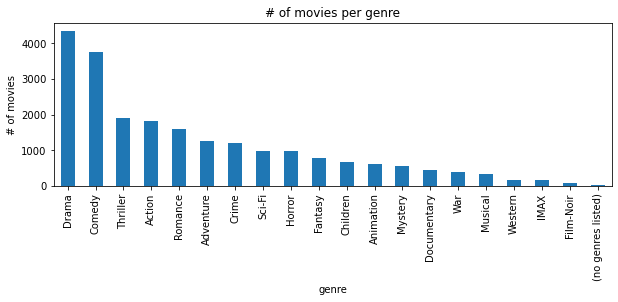

In [19]:
# Genres
all_genres = [s.split("|") for s in movies[movies.genres.notnull()].genres]
genres = [item for l in all_genres for item in l ]
unique_genres = set(genres)
print (f"total of {len(unique_genres)} unique genres from {len(genres)} occurances.")
pd.Series(genres).value_counts().plot(kind='bar', figsize=(10, 3))
plt.title("# of movies per genre")
plt.ylabel("# of movies")
plt.xlabel("genre")
plt.show()

total of 54 unique genres from 2525 occurances.


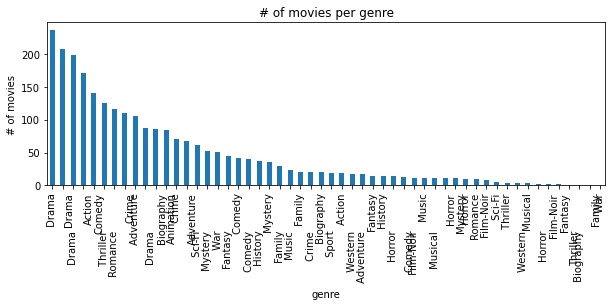

In [20]:
# Genres
all_genres = [s.split(",") for s in top[top.genre.notnull()].genre]
genres = [item for l in all_genres for item in l ]
unique_genres = set(genres)
print (f"total of {len(unique_genres)} unique genres from {len(genres)} occurances.")
pd.Series(genres).value_counts().plot(kind='bar', figsize=(10, 3))
plt.title("# of movies per genre")
plt.ylabel("# of movies")
plt.xlabel("genre")
plt.show()

In [21]:
# Sort by popularity
sorted_by_popularity = top.sort_values(by='votes', ascending=False)
print ("Most popular movies:\n", sorted_by_popularity['movie'].values[:10])

Most popular movies:
 ['Braveheart' 'Iron Man' 'Star Wars: Episode VI - Return of the Jedi'
 'The Lion King' 'Finding Nemo' 'It Happened One Night'
 'Diarios de motocicleta' 'The Last Emperor' 'Trois couleurs: Rouge'
 'Patton']


In [22]:
# Sort by rating
sorted_by_popularity = top.sort_values(by='rating', ascending=False)
print ("Most Rated movies:\n", sorted_by_popularity['movie'].values[:10])

Most Rated movies:
 ['Jai Bhim' 'The Shawshank Redemption' 'The Godfather' 'Soorarai Pottru'
 'The Dark Knight' '12 Angry Men' 'The Godfather: Part II' 'Pulp Fiction'
 'The Lord of the Rings: The Return of the King' "Schindler's List"]


## Ratings

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


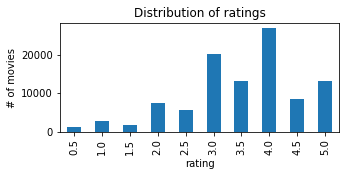

In [23]:
# Distribution of ratings
print (rating['rating'].describe())
pd.Series(rating['rating']).value_counts().sort_index().plot(kind='bar', figsize=(5, 2))
plt.title("Distribution of ratings")
plt.ylabel("# of movies")
plt.xlabel("rating")
plt.show()

In [24]:
sorted_by_users = rating.groupby('userId')['movieId'].count().sort_values(ascending=False)
print ("Most active users:\n", sorted_by_users.values[:10])

Most active users:
 [2698 2478 2108 1864 1346 1302 1260 1218 1115 1055]


In [25]:
sorted_by_movies = rating.groupby('movieId')['userId'].count().sort_values(ascending=False)
print ("Most rated movies:\n", sorted_by_movies.values[:10])

Most rated movies:
 [329 317 307 279 278 251 238 237 224 220]


# Upcoming

In [26]:
up = pd.read_csv('../data/final_comingsoon.csv')

In [27]:
up.head()

,Unnamed: 0,Unnamed: 0.1,Movie Name,Genre
0,0,0,Red Rocket (2021),"[<span>Comedy</span>, <span class=""ghost"">|</s..."
1,1,1,Silent Night (2021),"[<span class=""certRating"">M18</span>, <span>Co..."
2,2,2,Twas the Night (2021),"[<span>Comedy</span>, <span class=""ghost"">|</s..."
3,3,3,West Side Story (2021),"[<span class=""certRating"">PG13</span>, <span>C..."
4,4,4,France (2021),"[<span class=""certRating"">PG13</span>, <span>C..."


In [28]:
up['Genre'] = up['Genre'].str.replace("<span>","")
up['Genre'] = up['Genre'].str.replace("</span>","")
#up.drop(['Unnamed: 0.1'], axis=1, inplace=True)
up['Genre'] = up['Genre'].str.replace("[","")
up['Genre'] = up['Genre'].str.replace("]","")
up['Genre'] = up['Genre'].str.replace("span","")
up['Genre'] = up['Genre'].str.replace("<","")
up['Genre'] = up['Genre'].str.replace(">","")
up['Genre'] = up['Genre'].str.replace("=","")
up['Genre'] = up['Genre'].str.replace("=","")

<ipython-input-28-53bfe1d0eeef>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  up['Genre'] = up['Genre'].str.replace("[","")
<ipython-input-28-53bfe1d0eeef>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  up['Genre'] = up['Genre'].str.replace("]","")


In [29]:
up.head()

,Unnamed: 0,Unnamed: 0.1,Movie Name,Genre
0,0,0,Red Rocket (2021),"Comedy, class""ghost""|, Drama, class""metascor..."
1,1,1,Silent Night (2021),"class""certRating""M18, Comedy, class""ghost""|,..."
2,2,2,Twas the Night (2021),"Comedy, class""ghost""|, Thriller, \na href""/na..."
3,3,3,West Side Story (2021),"class""certRating""PG13, Crime, class""ghost""|,..."
4,4,4,France (2021),"class""certRating""PG13, Comedy, class""ghost""|..."
